<b>¡Hola Manuel!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>

Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!


## 1. Leer los datos

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## 2. Preparando los datos

In [2]:
# 2.1 Reemplaza los nombres de las columnas a minusculas
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [3]:
# 2.2 Convierte los datos en los tipos necesarios y analiza y procesa los NAN
# Revisa los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Puede no ser necesario el cambio de float a int en la colmuna 'year_of_release', en lo personal no le 
# veo sentido manenerlo como float pues el dato del año siempre debe ser un entero, mas para poder 
# cambiarlo, primero debo eliminar los NAN de dicha columna, estos seran eliminados ya que es un 
# porcentaje muy bajo de la informacion contenida en el dataset, la cual no impactara en el analisis
df = df.dropna(subset=['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


<div class="alert alert-block alert-success">
<b>Celda [4]</b> <a class="tocSkip"></a><br>
Muy bien fundamentada la decisión de eliminar los valores nulos en la columna <code>year_of_release</code> y convertirla a entero. Justificaste correctamente por qué este tipo de dato no tiene sentido como <code>float</code> y explicaste el impacto bajo de dicha pérdida en el análisis.
</div>


In [5]:
# Revisamos el user_score ya que al ser un dato numerico parece estar mal clasificado como object
# ¿sera que algun dato dentro de la misma esta provocando esa clasificacion?
# empezamos por unique
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [6]:
# se entiende que tbd es una clasificacion en espera o por determinar, lo cual convierte dicha columna
# en object, pero al ser un dato relevante a futuro para este analisis, lo cambiaremos por NAN, no debo
# usar la mediana para asignar una posible calificacion ya que eso puede afectar el resultado en los 
# analisis estadisticos.
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype(float)
print(df['user_score'].unique())
df['user_score'].dtype

[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]


dtype('float64')

<div class="alert alert-block alert-warning">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
¡Buen trabajo al detectar que la columna <code>user_score</code> debía convertirse a tipo numérico! Esto es fundamental para los análisis estadísticos posteriores.  
Una alternativa que podrías considerar para hacer esta conversión de forma más robusta es usar la función <code>pd.to_numeric()</code> con el argumento <code>errors='coerce'</code>. Esto permite que cualquier valor no convertible se transforme automáticamente en <code>NaN</code>, sin necesidad de reemplazar manualmente los textos como <code>'tbd'</code>.<br><br>
Por ejemplo:
<pre>
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
</pre>
Además, te sugiero incluir una línea para verificar cuántos valores faltantes resultan después de la conversión, como esta:
<pre>
print(df['user_score'].isna().mean())
</pre>
Esto te permitirá estimar si vale la pena imputarlos, eliminarlos o conservarlos.
</div>


In [7]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
df = df.dropna(subset=['name'])
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [9]:
# Los NAN en las columnas referentes a critic_score, user_score, rating, pueden existir debido a que se 
# trata de informacion proveniente a entidades distimtas a quienes generan las ventas, es alta la falta
# de esta informacion en el dataset, debido a ello no se eliminaran, ni modificaran, ya que eso afectaria
# el analisis que estamos llevando a cabo, pues hablamas de faltantes de informacin desde 49 hasta un 51%
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [10]:
# 2.2 Incluir en el df una nueva columna con incluya las ventas totales
df['total_sales'] = df.na_sales + df.eu_sales + df.jp_sales +df.other_sales
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## 3 Analiza los datos

<AxesSubplot:xlabel='Año?', ylabel='Cantidad de juegos lanzados'>

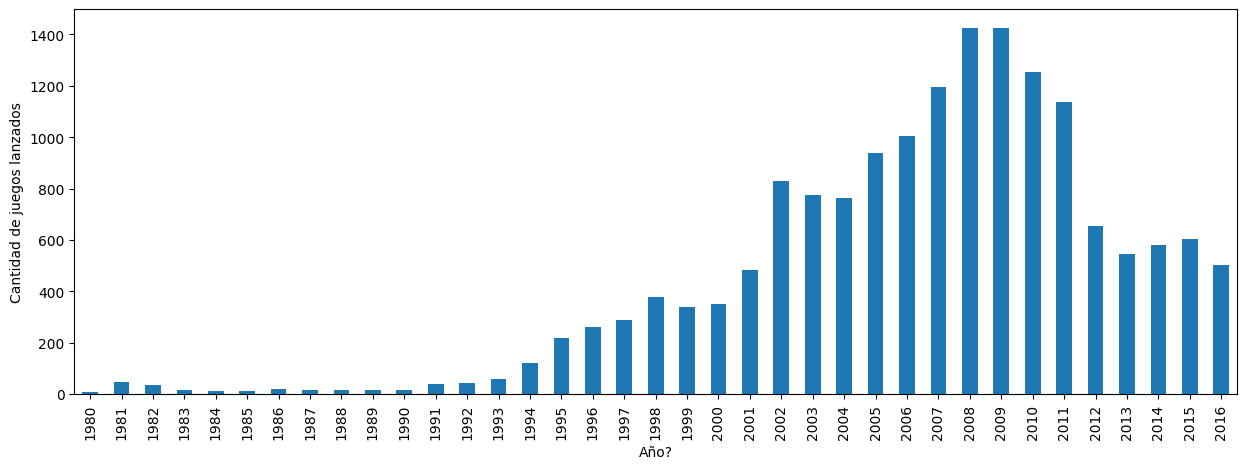

In [11]:
# 3.1 Cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
df.groupby('year_of_release')['name'].count().plot(figsize=(15,5), kind='bar', xlabel = 'Año?',
                                                   ylabel = 'Cantidad de juegos lanzados')

In [12]:
# 3.2 Determina para que periodo debes tomar datos.
# Trabajaremos con los datos del 2002 en adelante, ya que los años anteriores mo son relevantes, esto es
# debido a la curva de crecimiento en la popularidad de los video juegos como entretenimiento, inicia a
# partir del 2002, donde se mota el aumento de popularidad de manera enorme, teniendo sus mayores ventas
# del periodo comprendido entre el 2005 al 2011, incluso ya para el 2012 las ventas bajaron bastante
# desde la perspectiva de las tiendas minoristas, ya que la mayoria de las plataformas migro muchas de 
# sus ventas a traves de sus tiendas en linea.

In [13]:
# 3.3 Observa cómo varían las ventas de una plataforma a otra. 
# Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos
# de cada año. 
# Busca las plataformas que solían ser populares pero que ahora no tienen ventas. 
# ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

<AxesSubplot:xlabel='platform'>

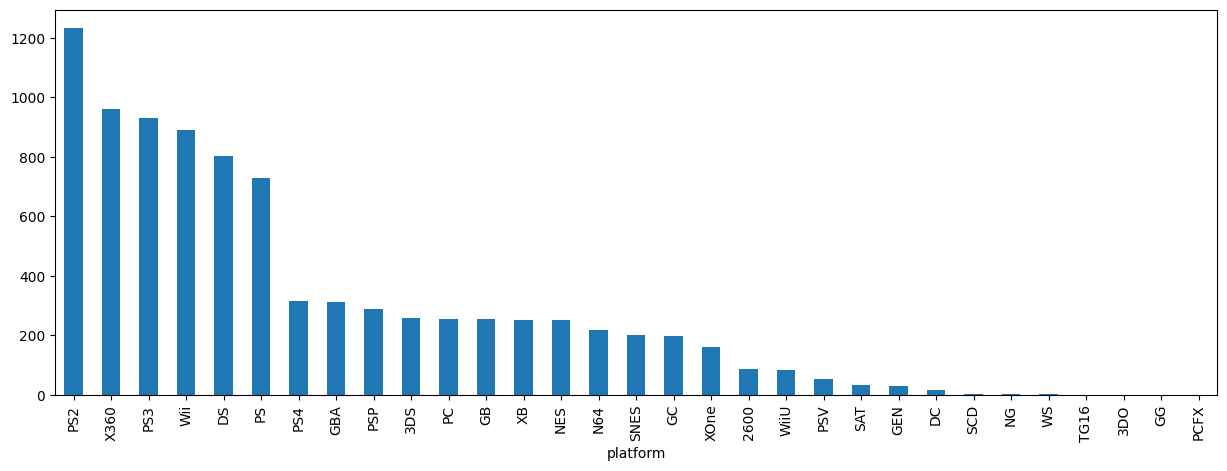

In [14]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(figsize=(15,5), kind='bar')

In [15]:
plataformas_populares = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'XOne', 'WiiU']
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [16]:
df_platform = df[df['platform'].isin(plataformas_populares)] #filtrando por plataformas populares
df_platform.head()
columns = ['year_of_release', 'platform']
df_platform_year = df_platform.groupby(columns)['total_sales'].agg(['sum']).reset_index()
df_platform_year = df_platform_year.rename(columns={'sum': 'total_sales'})
df_platform_year.head(5)

,year_of_release,platform,total_sales
0,1985,DS,0.02
1,1994,PS,6.03
2,1995,PS,35.96
3,1996,PS,94.70
4,1997,PS,136.17


<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

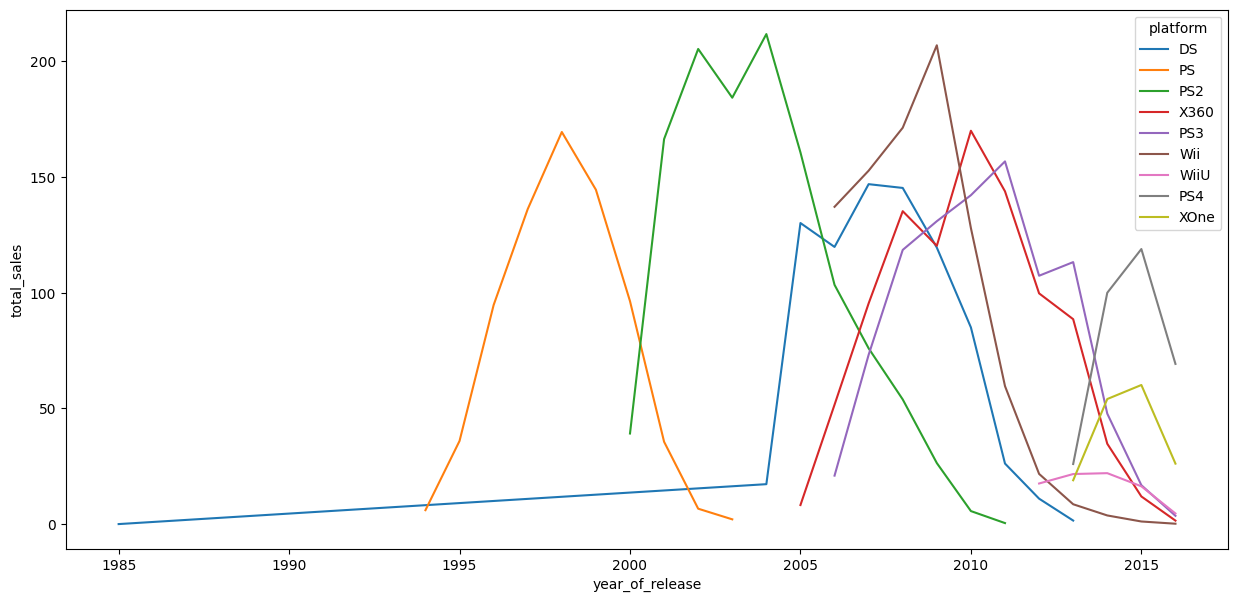

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.lineplot(data = df_platform_year, x = 'year_of_release', y = 'total_sales', hue = 'platform')

In [18]:
# El promedio de vida de una plataforma es de 10 años, cada plataforma logra su pico, en promedio, a 5
# años, cumplido ese tiempo se viene a la baja, la version nueva sale una año despues de este tiempo y 
# en los siguientes 4 años es sustituida completamente por la nueva version

In [19]:
# 3.3 Determina para que periodo debes tomar datos
# Consideraremos los datos del 2013 en adelante, lo que abarca las plataformas vigentes, pues no tiene
# caso trabajar con plataformas que ya no tienen ventas.
df_filtrado = df[df['year_of_release'] >= 2013]
df_filtrado.head()
plataformas_populares = ['X360', 'PS4', 'XOne', 'WiiU', '3DS']
df_filtrado_los = df_filtrado[df_filtrado['platform'].isin(plataformas_populares)] #filtrando por plataformas populares
columns = ['year_of_release', 'platform']
df_filtrado_los = df_filtrado_los.groupby(columns)['total_sales'].agg(['sum']).reset_index()
df_filtrado_los = df_filtrado_los.rename(columns={'sum': 'total_sales'})
print(df_filtrado_los.sort_values(by='total_sales', ascending=False).head())

    year_of_release platform  total_sales
11             2015      PS4       118.90
6              2014      PS4       100.00
3              2013     X360        88.58
16             2016      PS4        69.25
14             2015     XOne        60.14


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

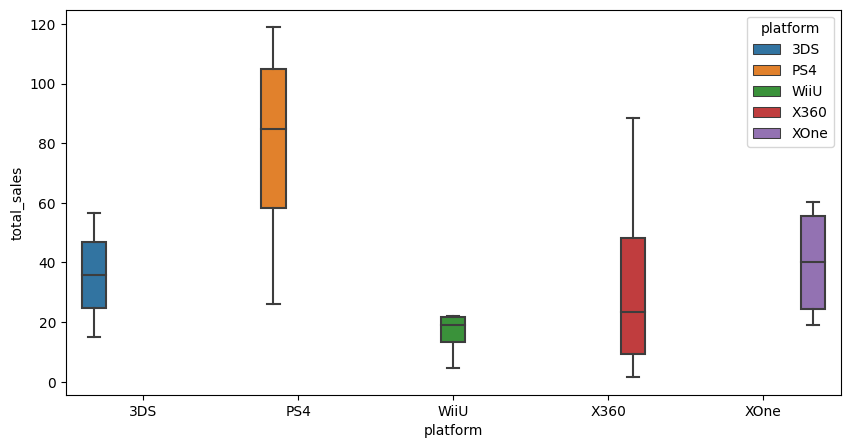

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df_filtrado_los, x='platform', y = 'total_sales', hue = 'platform')

In [21]:
# Las diferencias en ventas globales por plataforma son muy grandes PS4 es la lider en ventas, seguida
# por la X360, Tercer lugar para la XOne, le sigue la nintendo DS y por ultimo la WiiU.

In [22]:
# 3.4 Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular
# a tu elección. Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas.
# Saca conclusiones.

In [23]:
df_filt_2013 = df[df['year_of_release'] >= 2013]
#df_filt_2013.head()
plataforma_elegida = ['PS4']
df_filt_2013_ps4 = df_filt_2013[df_filt_2013['platform'].isin(plataforma_elegida)] #filtrando por plataformas populares
df_filt_2013_ps4.head(5)
df_filt_2013_ps4['user_sc_100'] = df_filt_2013_ps4['user_score'] * 10 
df_filt_2013_ps4.head(5)

/tmp/ipykernel_616/3493240219.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt_2013_ps4['user_sc_100'] = df_filt_2013_ps4['user_score'] * 10


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,user_sc_100
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63,NaN
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,83.0
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,43.0
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98,NaN
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,57.0


<div class="alert alert-block alert-warning">
<b>Celda [23]</b> <a class="tocSkip"></a><br>
Se introduce una nueva columna <code>user_sc_100</code> sin un paso previo claro de verificación de <code>NaN</code> o valores nulos. Esto podría afectar interpretaciones posteriores. Recomiendo añadir una línea para verificar o imputar/filtrar previamente los valores faltantes antes de esta transformación.
</div>


<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

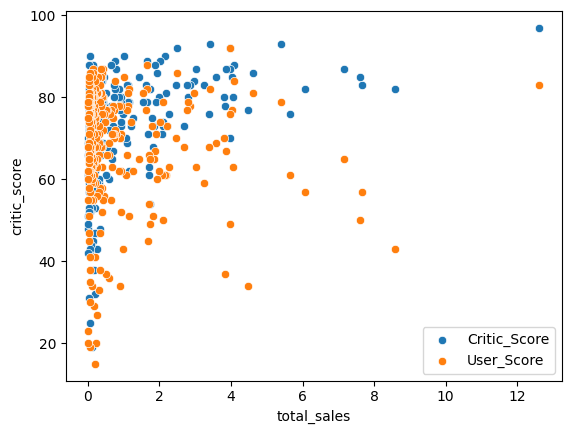

In [24]:
sns.scatterplot(data=df_filt_2013_ps4, x='total_sales', y='critic_score', label='Critic_Score')
sns.scatterplot(data=df_filt_2013_ps4, x='total_sales', y='user_sc_100', label='User_Score')

In [25]:
# Es notorio la correlacion entre las calificaciones y las ventas, aunque tambien denota que las
# calificaciones de los criticos tienen mas peso, en las ventas, que la de los usuarios, para tener una
# mejor comparacion en las calificaciones decidi multiplicar por 10 la calificacion de los usuarios
# ya que la calificaion de los criticos va del 1 al 100 y la de los usuarios del 1 al 10

In [26]:
#Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [27]:
df_filt_2013 = df[df['year_of_release'] >= 2013]
df_filt_2013.head()
plataformas_elegidas = ['X360', 'XOne', 'WiiU', '3DS']
df_filt_2013_plats = df_filt_2013[df_filt_2013['platform'].isin(plataformas_elegidas)] #filtrando por plataformas populares
#df_filt_2013_ps4.head(5)
df_filt_2013_plats['user_sc_100'] = df_filt_2013_plats['user_score'] * 10 
df_filt_2013_plats.head(5)

/tmp/ipykernel_616/2175089678.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt_2013_plats['user_sc_100'] = df_filt_2013_plats['user_score'] * 10


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,user_sc_100
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,81.0
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60,NaN
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68,NaN
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24,26.0
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18,NaN


<AxesSubplot:xlabel='total_sales', ylabel='user_sc_100'>

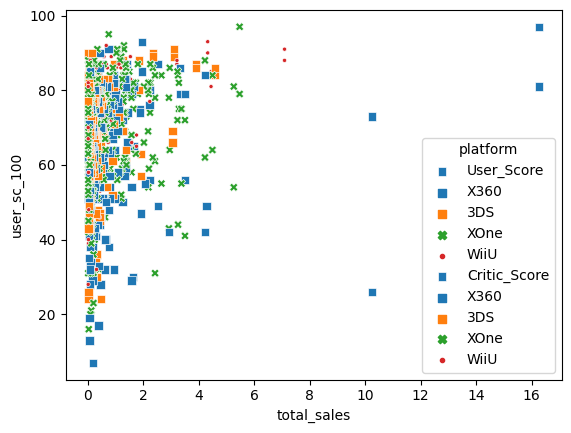

In [28]:
markers = {'X360':'s', 'XOne':'X', 'WiiU':'.', '3DS':','}
#markers_user = {'X360':'o', 'XOne':'d', 'WiiU':'*', '3DS':'+'}
sns.scatterplot(data=df_filt_2013_plats, x='total_sales', y='user_sc_100', hue='platform', label='User_Score', style='platform', markers=markers)
sns.scatterplot(data=df_filt_2013_plats, x='total_sales', y='critic_score', hue='platform', label='Critic_Score', style='platform', markers=markers)

<div class="alert alert-block alert-warning">
<b>Celda [28]</b> <a class="tocSkip"></a><br>
Es muy buena la iniciativa de visualizar la relación entre <code>user_score</code>, <code>critic_score</code> y <code>total_sales</code> en varias plataformas. Sin embargo, el gráfico puede volverse confuso si no se configuran adecuadamente los parámetros de <code>seaborn.scatterplot()</code>.<br><br>
Aquí van tres sugerencias concretas que puedes implementar para mejorar la visualización:

1. **Evita el argumento <code>label=</code> si ya estás usando <code>hue</code>**, ya que puede duplicar la leyenda o hacerla poco clara.
2. **Agrega un título y etiquetas a los ejes** para contextualizar la gráfica:
<pre>
plt.title('Relación entre ventas y calificaciones por plataforma')
plt.xlabel('Ventas Totales (millones)')
plt.ylabel('Puntaje de usuarios y críticos')
</pre>
3. **Considera usar subgráficos (<code>FacetGrid</code>)** si quieres comparar por plataforma sin que se mezclen demasiado los puntos.

Con estas mejoras, el gráfico ayudará mucho más a comunicar tus hallazgos de forma clara.
</div>


In [29]:
# Es similar el comportamiento en las otras plataformas, considero que el peso mayor en el impacto en las
# lo tiene la calificacion de los criticos.

# 3.5 Echa un vistazo a la distribución general de los juegos por género

In [30]:
# ¿Qué se puede decir de los géneros más rentables? 
# ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [31]:
sales_by_genre = df_filt_2013.groupby('genre')['total_sales'].sum()
sales_by_genre.sort_values(ascending=False).head(12)

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64

<div class="alert alert-block alert-success">
<b>Celda [31]</b> <a class="tocSkip"></a><br>
Buen enfoque para detectar los géneros más rentables. El uso de <code>groupby</code> junto con <code>sort_values</code> permite visualizar claramente la jerarquía de ventas por género.
</div>


In [32]:
#Los generos mas rentables son los que generan competencia contra otros, ya sea individual o en equipo
#Los de ventas menores, en su mayoria, son juegos individaules o donde se pone en juego la imteligencia
#del jugador como la herramienta mas importante para llevarlo a cabo.

## 4. Crea un perfil de usuario para cada región (NA, UE, JP)

In [52]:
# 4.1 Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado
# de una región a otra.
df_agrupado = df_filtrado.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
df_agrup_na_sales = df_agrupado[['platform', 'na_sales']].sort_values(by = 'na_sales', ascending = False).head(5)
df_agrup_eu_sales = df_agrupado[['platform', 'eu_sales']].sort_values(by = 'eu_sales', ascending = False).head(5)
df_agrup_jp_sales = df_agrupado[['platform', 'jp_sales']].sort_values(by = 'jp_sales', ascending = False).head(5)
print(df_agrup_na_sales)
print()
print(df_agrup_eu_sales)
print()
print(df_agrup_jp_sales)

   platform  na_sales
4       PS4    108.74
10     XOne     93.12
9      X360     81.66
3       PS3     63.50
0       3DS     38.20

   platform  eu_sales
4       PS4    141.09
3       PS3     67.81
10     XOne     51.59
9      X360     42.52
0       3DS     30.96

  platform  jp_sales
0      3DS     67.81
3      PS3     23.35
6      PSV     18.59
4      PS4     15.96
8     WiiU     10.88


In [34]:
# Las ventas en EEUU(na_sales) y la Union Europea(eu_sales) van a la vanguardia en el sentido de las
# plataformas mas nuevas, donde lo primordial parece ser que en cuanto sale la nueva plataforma la
# cambian.
# Por su parte las ventas en japon(jp_sales) no urge el cambio de plataforma, parece que ellos siguen
# disfrutando de sus consolas por mas tiempo sin importar si salio la mas nueva, ademas que prefieren
# las plataformas creadas en su pais, como lo son Sony y Nintendo, pues la plataforma de microsoft, ni 
# siquiera aparece en el top 5

In [35]:
# 4.2 Los cinco géneros principales. Explica la diferencia.
df_agrupado = df_filtrado.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
df_agrup_na_genre = df_agrupado[['genre', 'na_sales']].sort_values(by = 'na_sales', ascending = False).head(5)
df_agrup_eu_genre = df_agrupado[['genre', 'eu_sales']].sort_values(by = 'eu_sales', ascending = False).head(5)
df_agrup_jp_genre = df_agrupado[['genre', 'jp_sales']].sort_values(by = 'jp_sales', ascending = False).head(5)
print(df_agrup_na_genre)
print()
print(df_agrup_eu_genre)
print()
print(df_agrup_jp_genre)

           genre  na_sales
0         Action    126.05
8        Shooter    109.74
10        Sports     65.27
7   Role-Playing     46.40
3           Misc     27.49

           genre  eu_sales
0         Action    118.13
8        Shooter     87.86
10        Sports     60.52
7   Role-Playing     36.97
6         Racing     20.19

          genre  jp_sales
7  Role-Playing     51.04
0        Action     40.49
3          Misc      9.20
2      Fighting      7.65
8       Shooter      6.61


In [36]:
# Las ventas de los juegos segun el genero son similares en EEUU(na_sales) y la Union Europea(eu_sales)
# Japon es el que marca la pauta en diferenciarse de las otras dos regiones, parece que los gustos de los
# jugadores nipones distan mucho de los occidentales, los japoneses prefieren los juegos de rol, seguidos
# por los juegos de accion, pero si vemos el nivel de ventas estnan hasta un 60% mas aabjo que las dos
# regiones occidentales, lo que es basmtante notable que son mercados tan diferentes.

In [37]:
# 4.3 Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
df_agrupado = df_filtrado.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
df_agrup_na_rating = df_agrupado[['rating', 'na_sales']].sort_values(by = 'na_sales', ascending = False).head(5)
df_agrup_eu_rating = df_agrupado[['rating', 'eu_sales']].sort_values(by = 'eu_sales', ascending = False).head(5)
df_agrup_jp_rating = df_agrupado[['rating', 'jp_sales']].sort_values(by = 'jp_sales', ascending = False).head(5)
print(df_agrup_na_rating)
print()
print(df_agrup_eu_rating)
print()
print(df_agrup_jp_rating)

  rating  na_sales
2      M    165.21
0      E     79.05
1   E10+     54.24
3      T     49.79

  rating  eu_sales
2      M    145.32
0      E     83.36
1   E10+     42.69
3      T     41.95

  rating  jp_sales
3      T     20.59
0      E     15.14
2      M     14.11
1   E10+      5.89


In [38]:
# Practicamente las regiones occidentales consumen juegos en la misma clasificacion y con ventas
# muy similares
# Son los japoneses los que marcam la pauta en la diferenciacion, su primer lugar en ventas es ek ultimo
# en las otras 2 regiones, parece ser que el usuario consumidor de video juegos es muy distinto en de 
# las dos regiones occidentales a los japoneses, donde parece ser que quienes mas consumen son los 
# adultos y en japon son los adolescentes, ¿o sera que hay una mayor vigilancia por parte de los padres
# en el tipo de juegos que consumen sus hijos?

## Paso 5. Prueba las siguientes hipótesis:
#### 1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
#### 2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. 

In [39]:
# Establece tu mismo el valor de umbral alfa.
# Explica:
# Cómo formulaste las hipótesis nula y alternativa.
# Qué criterio utilizaste para probar las hipótesis y por qué.

In [40]:
# 5.1 HO: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
# H1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
Xbox_One = df_filtrado[df_filtrado['platform']=='XOne']['user_score'].dropna()
PC = df_filtrado[df_filtrado['platform']=='PC']['user_score'].dropna()

In [41]:
from scipy import stats as st
import numpy as np

estadistico, pvalue = st.ttest_ind(Xbox_One, PC, equal_var=False)
alpha = 0.05

if pvalue < alpha:
    print('Se rechaza la hipotesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes')
elif pvalue >= alpha:
    print('No se puede rechazar la hipotesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas')


No se puede rechazar la hipotesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas


<div class="alert alert-block alert-warning">
<b>Celda [41]</b> <a class="tocSkip"></a><br>
Buen uso de la prueba de hipótesis con <code>ttest_ind</code>. Para reforzar la comprensión y claridad del análisis, sería ideal que antes de aplicar la prueba incluyas un análisis exploratorio de las muestras. Puedes hacerlo mostrando su media y desviación estándar con:

<pre>
print('Media XOne:', Xbox_One.mean(), ' - Desviación estándar:', Xbox_One.std())
print('Media PC:', PC.mean(), ' - Desviación estándar:', PC.std())
</pre>

Esto te permitirá observar si hay diferencias aparentes en los promedios antes de aplicar la prueba estadística, y además ayudará al lector a interpretar los resultados del <code>p-value</code> con más contexto.
</div>


In [42]:
df_filtrado['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

In [43]:
# 5.2 HO: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
# H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
action = df_filtrado[df_filtrado['genre']=='Action']['user_score'].dropna()
sports = df_filtrado[df_filtrado['genre']=='Sports']['user_score'].dropna()

In [44]:
from scipy import stats as st
import numpy as np

estadistico, pvalue = st.ttest_ind(action, sports, equal_var=False)
alpha = 0.05

if pvalue < alpha:
    print('Se rechaza la hipotesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes')
elif pvalue >= alpha:
    print('No se puede rechazar la hipotesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales')


Se rechaza la hipotesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes


In [45]:
# 1. La igualdad de la media es lo que nos da la pauta para definir la hipotesis nula, una vez establecida
# estal la hipotesis alternativa siempre sera lo contrario de la hipotesis nula, la diferencia de la media.
# 2. Debido a que debi comparar dos poblaciones distintas (2 plataformas y generos distintos) fue que
# elegi usar la hipotesis sobre la igualdad de la media de 2 poblaciones

## 6 Conclusion general

El mercado global de los videojuegos, aunque puede aplicar para cualquier producto o segmento, tiene
muchos factores a tomar en cuenta para lograr maximizar las ventas en los productos, no solo en los
juegos tambien en las consolas, aunque algunas regiones pueden tener niveles de venta y penetracion
similares, otros pueden ser muy difrentes, la cultura de cada region y pais influye de manera importante
en ello. no tomar los diversos factores en cuenta, puede ocasionar que cualquier estrategia de marketing
o del tipo que se requiera, para mejorar la penetracion, imagen o ventas de una empresa, derivara en 
que no se obtenga ningun beneficio o que lo esperado sea muy inferior a lo proyectado

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Manuel! Se nota dedicación en tu enfoque y una base sólida en limpieza de datos, visualización y análisis comparativo entre plataformas y regiones.  
Recomiendo seguir desarrollando la parte de comunicación visual de resultados (gráficos más descriptivos) y profundizar en técnicas de validación estadística para fortalecer tu proyecto como pieza de portafolio.  
¡Sigue adelante con este entusiasmo por aprender!
</div>
